In [1]:
%matplotlib inline

In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from collections import defaultdict, namedtuple

In [9]:
from game import NUM_PLAYERS, NUM_ROUNDS, MISSION_SIZE, display_move, PhysicalGameState
from forward_solver import get_value_and_move, initial_belief, initial_k_belief, single_belief_update, k_belief_update

In [7]:
def solve_forward(player, bad, k):
    assert k >= 1
    k -= 1
    state = PhysicalGameState()
    is_bad = player == bad
    initial = initial_belief(player, is_bad)
    initial_k = initial_k_belief(k)
    get_value_and_move(state, player, is_bad, initial, initial_k)

In [12]:
for k in range(1, 10):
    for player in range(NUM_PLAYERS):
        for is_bad in [True, False]:
            print "Solving player={} k={} is_bad={}".format(player, k, is_bad)
            solve_forward(player, is_bad, k)

Solving player=0 k=1 is_bad=True
Solving player=0 k=1 is_bad=False
Solving player=1 k=1 is_bad=True
Solving player=1 k=1 is_bad=False
Solving player=2 k=1 is_bad=True
Solving player=2 k=1 is_bad=False
Solving player=0 k=2 is_bad=True
Solving player=0 k=2 is_bad=False
Solving player=1 k=2 is_bad=True
Solving player=1 k=2 is_bad=False
Solving player=2 k=2 is_bad=True
Solving player=2 k=2 is_bad=False
Solving player=0 k=3 is_bad=True
Solving player=0 k=3 is_bad=False
Solving player=1 k=3 is_bad=True
Solving player=1 k=3 is_bad=False
Solving player=2 k=3 is_bad=True
Solving player=2 k=3 is_bad=False
Solving player=0 k=4 is_bad=True
Solving player=0 k=4 is_bad=False
Solving player=1 k=4 is_bad=True
Solving player=1 k=4 is_bad=False
Solving player=2 k=4 is_bad=True
Solving player=2 k=4 is_bad=False
Solving player=0 k=5 is_bad=True
Solving player=0 k=5 is_bad=False
Solving player=1 k=5 is_bad=True
Solving player=1 k=5 is_bad=False
Solving player=2 k=5 is_bad=True
Solving player=2 k=5 is_bad=F

In [15]:
def get_move(moveset):
    moves, probabilities = zip(*moveset.items())
    index = np.random.choice(np.arange(len(moves)), p=np.array(probabilities))
    return moves[index]

In [16]:
def play_game(ks, bad):
    state = PhysicalGameState()

    total_payoff = 0.0

    player_beliefs = [
        [initial_belief(player, player == bad) if k >= 1 else None, initial_k_belief(k - 1)]
        for player, k in enumerate(ks)
    ]

    while not state.finished():
        moves = [
            get_value_and_move(
                state,
                player,
                player == bad,
                player_beliefs[player][0],
                player_beliefs[player][1]
            )[1]
            for player in range(NUM_PLAYERS)
        ]

        moves = [get_move(moveset) for moveset in moves]

        payoff = state.payoff(moves, bad, False)
        total_payoff += payoff
        new_state = state.move(moves)

        for player in range(NUM_PLAYERS):
            player_beliefs[player][0] = single_belief_update(state, tuple(moves), player_beliefs[player][0], player_beliefs[player][1])
            player_beliefs[player][1] = k_belief_update(state, tuple(moves), player_beliefs[player][1])

        state = new_state

    return total_payoff

In [33]:
def average_payoff(ks, bad, num=1000):
    total_payoff = 0.0
    for _ in range(num):
        total_payoff += play_game(ks, bad)
    
    return total_payoff/num

In [63]:
average_payoff([8, 1, 1], 0)

-135.454

In [68]:
def plot_good_k_vs_avg_payoff(bad_guy, bad_guy_k):
    k_levels = range(1, 10)
    
    ks_s = [ tuple([bad_guy_k if p == bad_guy else k for p in range(NUM_PLAYERS)]) for k in k_levels ]
    
    average_payoffs = [average_payoff(ks, bad_guy) for ks in ks_s]
    plt.title('Avg Payoff vs. Good Guy K. Player {} Bad (k={})'.format(bad_guy, bad_guy_k))
    plt.ylabel('Average Payoff')
    plt.xlabel('K level')
    plt.ylim((-250, 25))
    plt.plot(k_levels, average_payoffs, linewidth=2)

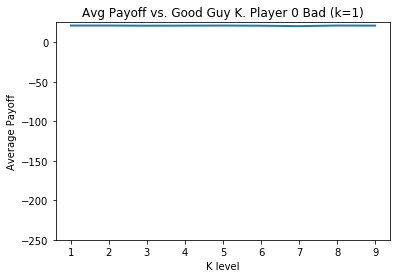

In [69]:
plot_good_k_vs_avg_payoff(0, 1)

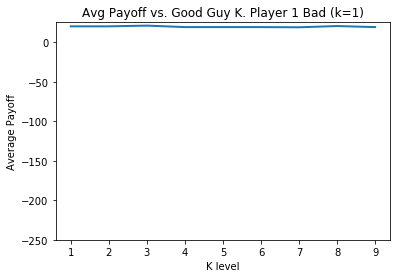

In [70]:
plot_good_k_vs_avg_payoff(1, 1)

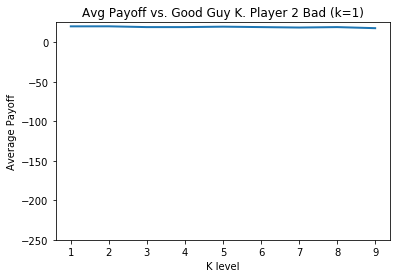

In [71]:
plot_good_k_vs_avg_payoff(2, 1)

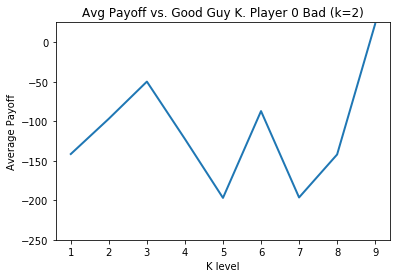

In [72]:
plot_good_k_vs_avg_payoff(0, 2)

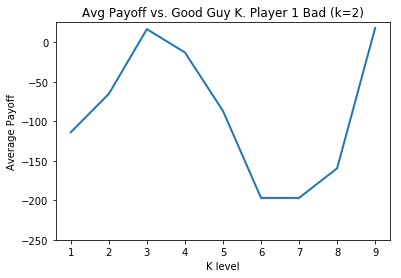

In [73]:
plot_good_k_vs_avg_payoff(1, 2)

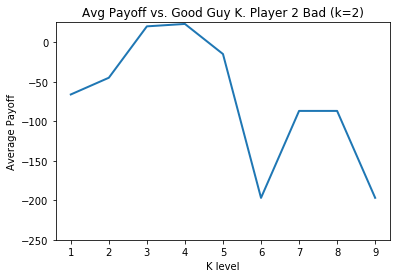

In [74]:
plot_good_k_vs_avg_payoff(2, 2)

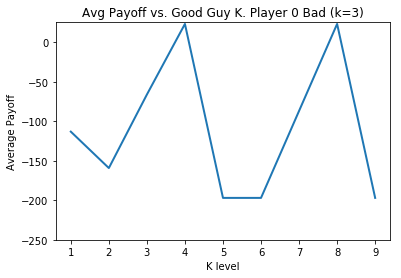

In [75]:
plot_good_k_vs_avg_payoff(0, 3)

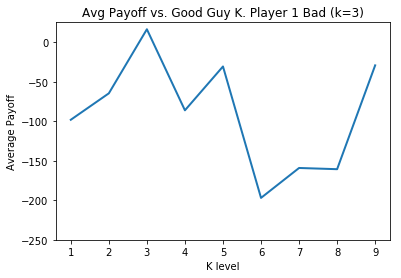

In [76]:
plot_good_k_vs_avg_payoff(1, 3)

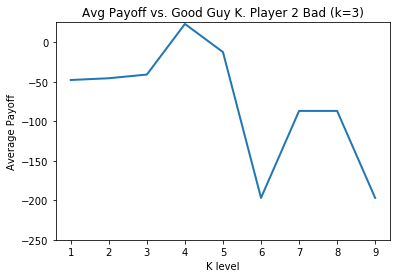

In [77]:
plot_good_k_vs_avg_payoff(2, 3)